In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Importing packages
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Dropout

In [6]:
# Setting paths for Training data and Test data
train_dir = '/content/drive/MyDrive/YellowRustDataset/Train_data'
test_dir = '/content/drive/MyDrive/YellowRustDataset/Test_data'


In [7]:
# Declaring Constants for model training
IMG_SIZE = (224, 224)
BATCH_SIZE = 128
EPOCHS = 50
NUM_CLASSES = 6 #recognise and classify

In [8]:
# Data augmentation for training set helps in generalizing the model
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,       # To Rotate images randomly within the range of 30 degrees
    width_shift_range=0.2,   # To Shift the width of the image randomly within 20% of the width
    height_shift_range=0.2,  # To Shift the height of the image randomly within 20% of the height
    shear_range=0.2,         # To Shear transformations with a range of 20%
    zoom_range=0.2,          # To Zoom the image randomly within 20%
    horizontal_flip=True,    # To Flip images horizontally randomly
)


# Data augmentation for test set
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)



In [9]:
# Loading and preprocessing the data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

print("Number of classes in the training data:", len(train_generator.class_indices))
print("Class indices mapping:", train_generator.class_indices)

print("\nNumber of classes in the test data:", len(test_generator.class_indices))
print("Class indices mapping:", test_generator.class_indices)



Found 4203 images belonging to 6 classes.
Found 700 images belonging to 6 classes.
Number of classes in the training data: 6
Class indices mapping: {'Moderately_Resistant': 0, 'Moderately_Resistant&Moderately_Suspectible': 1, 'Moderately_Suspectible': 2, 'No_disease': 3, 'Resistant': 4, 'Suspectible': 5}

Number of classes in the test data: 6
Class indices mapping: {'Moderately_Resistable&Moderately_Suspectible': 0, 'Moderately_Resistant': 1, 'Moderately_Supectible': 2, 'No_disease': 3, 'Resistant': 4, 'Supectible': 5}


In [10]:
# Creating the model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x) #fully connected dense layer aso acts as bottleneck
x = Dropout(0.5)(x)    #regularization technique
predictions = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)


9406464/9406464 [==============================] - 1s 0us/step


In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [12]:

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=EPOCHS)


Epoch 1/50
33/33 [==============================] - 1493s 44s/step - loss: 1.4822 - accuracy: 0.3693
Epoch 2/50
33/33 [==============================] - 77s 2s/step - loss: 1.0405 - accuracy: 0.5489
Epoch 3/50
33/33 [==============================] - 78s 2s/step - loss: 0.9270 - accuracy: 0.6077
Epoch 4/50
33/33 [==============================] - 76s 2s/step - loss: 0.8255 - accuracy: 0.6429
Epoch 5/50
33/33 [==============================] - 76s 2s/step - loss: 0.7281 - accuracy: 0.6928
Epoch 6/50
33/33 [==============================] - 76s 2s/step - loss: 0.6510 - accuracy: 0.7323
Epoch 7/50
33/33 [==============================] - 81s 2s/step - loss: 0.6025 - accuracy: 0.7571
Epoch 8/50
33/33 [==============================] - 79s 2s/step - loss: 0.5293 - accuracy: 0.7813
Epoch 9/50
33/33 [==============================] - 81s 2s/step - loss: 0.4857 - accuracy: 0.7999
Epoch 10/50
33/33 [==============================] - 77s 2s/step - loss: 0.4433 - accuracy: 0.8301
Epoch 11/50
33/3

In [13]:

# Extract training accuracy values from the history object
train_accuracy = history.history['accuracy']

# Print the final training accuracy
final_train_accuracy = train_accuracy[-1]
print("Final Training Accuracy:", final_train_accuracy)


Final Training Accuracy: 0.9812039136886597


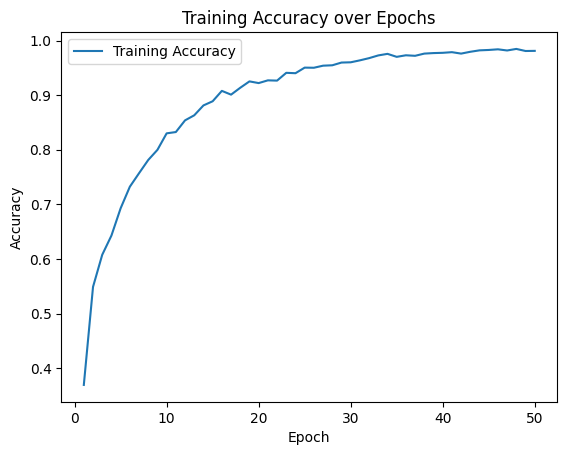

In [14]:

# Plot the accuracy graph
plt.plot(range(1, EPOCHS+1), train_accuracy, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')
plt.legend()
plt.show()

In [22]:
# Evaluating the model on the test set
loss, accuracy = model.evaluate(test_generator)
print("Test Loss:", loss) #prediction error
print("Test Accuracy:", accuracy) #successfully classified


6/6 [==============================] - 5s 805ms/step - loss: 0.0697 - accuracy: 0.9743
Test Loss:  0.0697
Test accuracy:  0.9743


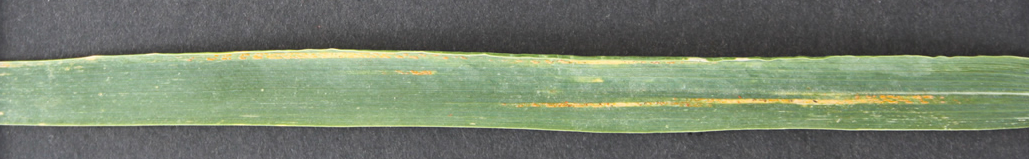

In [16]:
# Sample prediction of a new image
import PIL
image_shape=(224,224)
path='/content/drive/MyDrive/YellowRustDataset/Moderately_Resistant_and_Moderately_suspectible/3_MRMS_03.jpg'
test_image = PIL.Image.open(path)
test_image

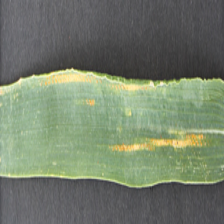

In [17]:
resized_ti = PIL.Image.open(path).resize(image_shape)
resized_ti

In [18]:
resized_ti=np.array(resized_ti)/255.0
resized_ti.shape

(224, 224, 3)

In [19]:
model.predict(resized_ti[np.newaxis,...])
result=model.predict(resized_ti[np.newaxis,...])
print(np.argmax(result))

1/1 [==============================] - 0s 28ms/step
1


In [20]:
labels_diction ={
    'No_disease' :3,
    'Resistant': 4,
    'Moderately_resistant': 0,
    'Mod_Resistant_&_Mod_Suspectible':1,
    'Moderately_Suspectible':2,
    'Suspectible':5,
}

value = {i for i in labels_diction if labels_diction[i]==np.argmax(result) }
print(value)

{'Mod_Resistant_&_Mod_Suspectible'}
